<a href="https://www.kaggle.com/code/manichandana9390/coffee-review-nn?scriptVersionId=146831478" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv
/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv


In [2]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
# Import pandas
import pandas as pd

# Import training data
df_train = pd.read_csv('/kaggle/input/coffee-reviews-dataset/coffee_analysis.csv')

# Print few random entries
df_train.sample(5)

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
815,Ethiopia Nano Challa Cold Brew,Bonfire Coffee Company,NaN,United States,Jimma Zone,Oromia State,1.34,94,July 2020,"A ready-to-drink black coffee, tested cold. Ri...",This coffee tied for the highest rating in a t...,"Sweet, juicy, citrusy, bright: Pair it with a ..."
1308,Kenya Lenana AA Plus,RamsHead Coffee Roasters,Medium-Light,United States,Mount Kenya Growing Region,Kenya,5.28,92,May 2021,"Crisply sweet-tart, deeply aromatic. Cocoa pow...",Produced by smallholding farmers and processed...,A sweet cocoa-toned Kenya cup complicated by a...
2002,Capitan Maragogype,Speckled Ax,Medium-Light,United States,Chiapas,Mexico,6.47,93,September 2022,"Richly chocolaty, deep-toned. Dark chocolate, ...",Produced by smallholding members of Cafe Capit...,A compelling umami-leaning Maragogype cup with...
1408,Nicaragua Jinotega Hacienda La Bastilla Blue C...,RamsHead Coffee Roasters,Medium-Light,United States,Jinotega,Nicaragua,5.28,92,August 2021,"Fruit-forward, deeply sweet. Blueberry, dark c...",Produced at Hacienda La Bastilla from trees of...,"A richly fruit-toned, crisply chocolaty natura..."
365,100% Kona Bourbon Pointu Laurina,Hula Daddy Kona Coffee,Medium-Light,Hawai'i,Holualoa,North Kona Growing District,19.82,95,February 2019,"Delicately fruit-toned, richly cocoa-driven. R...",This exceptional coffee was selected as the No...,"A bright, juicy, berry-toned Hawaii cup from t..."


# EDA****

In [4]:
# Checking the number of rows and columns
print("The DataFrame has " + str(df_train.shape[0]) + " samples and " + str(df_train.shape[1]) + " columns")

The DataFrame has 2095 samples and 12 columns


In [5]:
# Check duplicates
print("Duplicate entries in the dataset: " + str(df_train.duplicated().sum()))

Duplicate entries in the dataset: 0


In [6]:
# Check null values and data type of each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2095 non-null   object 
 1   roaster      2095 non-null   object 
 2   roast        2080 non-null   object 
 3   loc_country  2095 non-null   object 
 4   origin_1     2095 non-null   object 
 5   origin_2     2095 non-null   object 
 6   100g_USD     2095 non-null   float64
 7   rating       2095 non-null   int64  
 8   review_date  2095 non-null   object 
 9   desc_1       2095 non-null   object 
 10  desc_2       2095 non-null   object 
 11  desc_3       2093 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 196.5+ KB


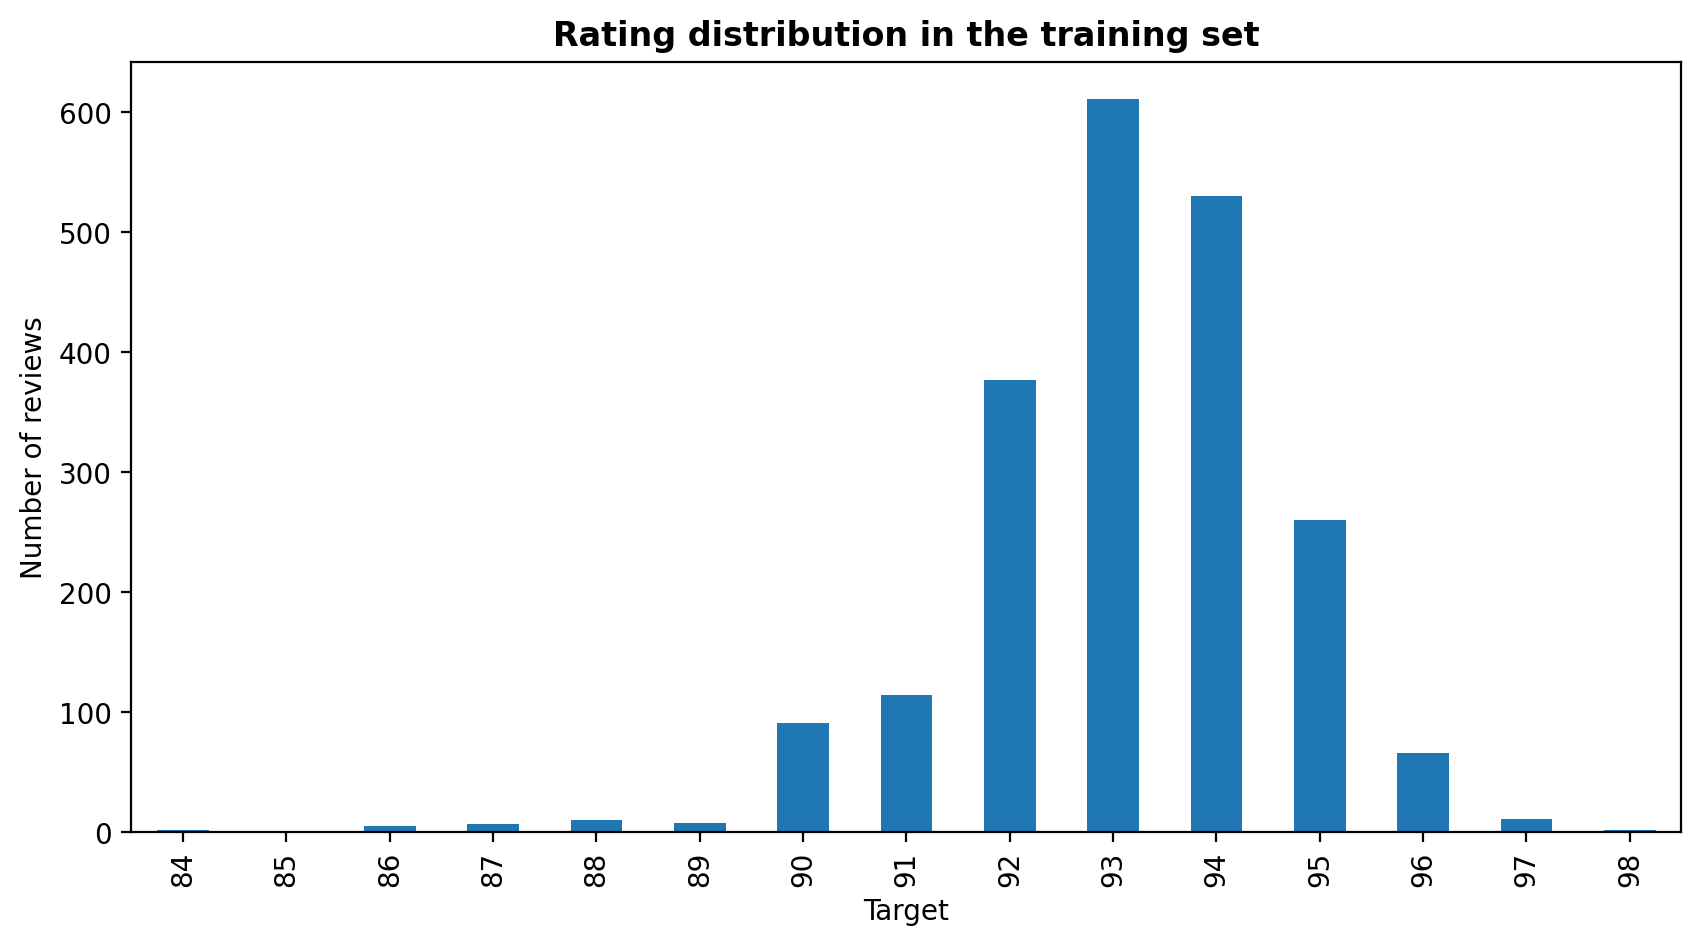

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# Check target balance
df_train['rating'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Rating distribution in the training set', fontweight="bold")
plt.xlabel('Target')
plt.ylabel('Number of reviews')
plt.show()

In [8]:
# Drop few columns
df_train = df_train.drop(columns=['name','roaster','roast','loc_country','origin_1','origin_2','100g_USD','desc_2','desc_3'])

In [9]:
import re
from nltk.corpus import stopwords

# Create a stopwords set adding some personal 'words'
stopwords_english = set(stopwords.words('english'))
my_stopwords = set(["http", "'s", "n't", "'m", "'re", "'ve"])
stopwords_english.update(my_stopwords)

def preprocess_review(text):
    # Convert to lower case
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Split text into tokens
    tokens = text.split()

    # Filter tokens
    clean_tokens = [tok for tok in tokens if tok not in stopwords_english and len(tok) > 1]

    # Join tokens into a string
    clean_text = ' '.join(clean_tokens)

    return clean_text

There are multiple ways to clean text, including stemming and lemmatization. Although these techniques can enhance the outcome, they also slow down the function considerably, especially for larger datasets like this one. For instance, my previous function using these techniques took more than an hour to train the dataset, whereas the new solution takes a little over a minute. Therefore, I opted for a faster function even though it may result in slightly less accuracy.

Let's check it out:

In [10]:
# Get one review as sample
sample = df_train['desc_1'][5]

print('ORIGINAL REVIEW:   ' + sample + '\n')
print('---------------------------------------------------------------------------- \n')
print('WITH PROCESSING:    ' + preprocess_review(sample))

ORIGINAL REVIEW:   Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in aroma and cup. Fruit-toned, deeply sweet structure with gently-expressed acidity; buoyant, satiny-smooth mouthfeel. The crisp, flavor-saturated finish is characterized by sweet-tart fruit and floral tones (raspberry, hibiscus).

---------------------------------------------------------------------------- 

WITH PROCESSING:    delicate richly sweetly tart dried hibiscus fine musk almond sandalwood raspberry aroma cup fruittoned deeply sweet structure gentlyexpressed acidity buoyant satinysmooth mouthfeel crisp flavorsaturated finish characterized sweettart fruit floral tones raspberry hibiscus


In [11]:
%%time

# Preprocess training data adding new column
df_train["clean_text"] = df_train["desc_1"].apply(preprocess_review)

CPU times: user 54.4 ms, sys: 0 ns, total: 54.4 ms
Wall time: 54.3 ms


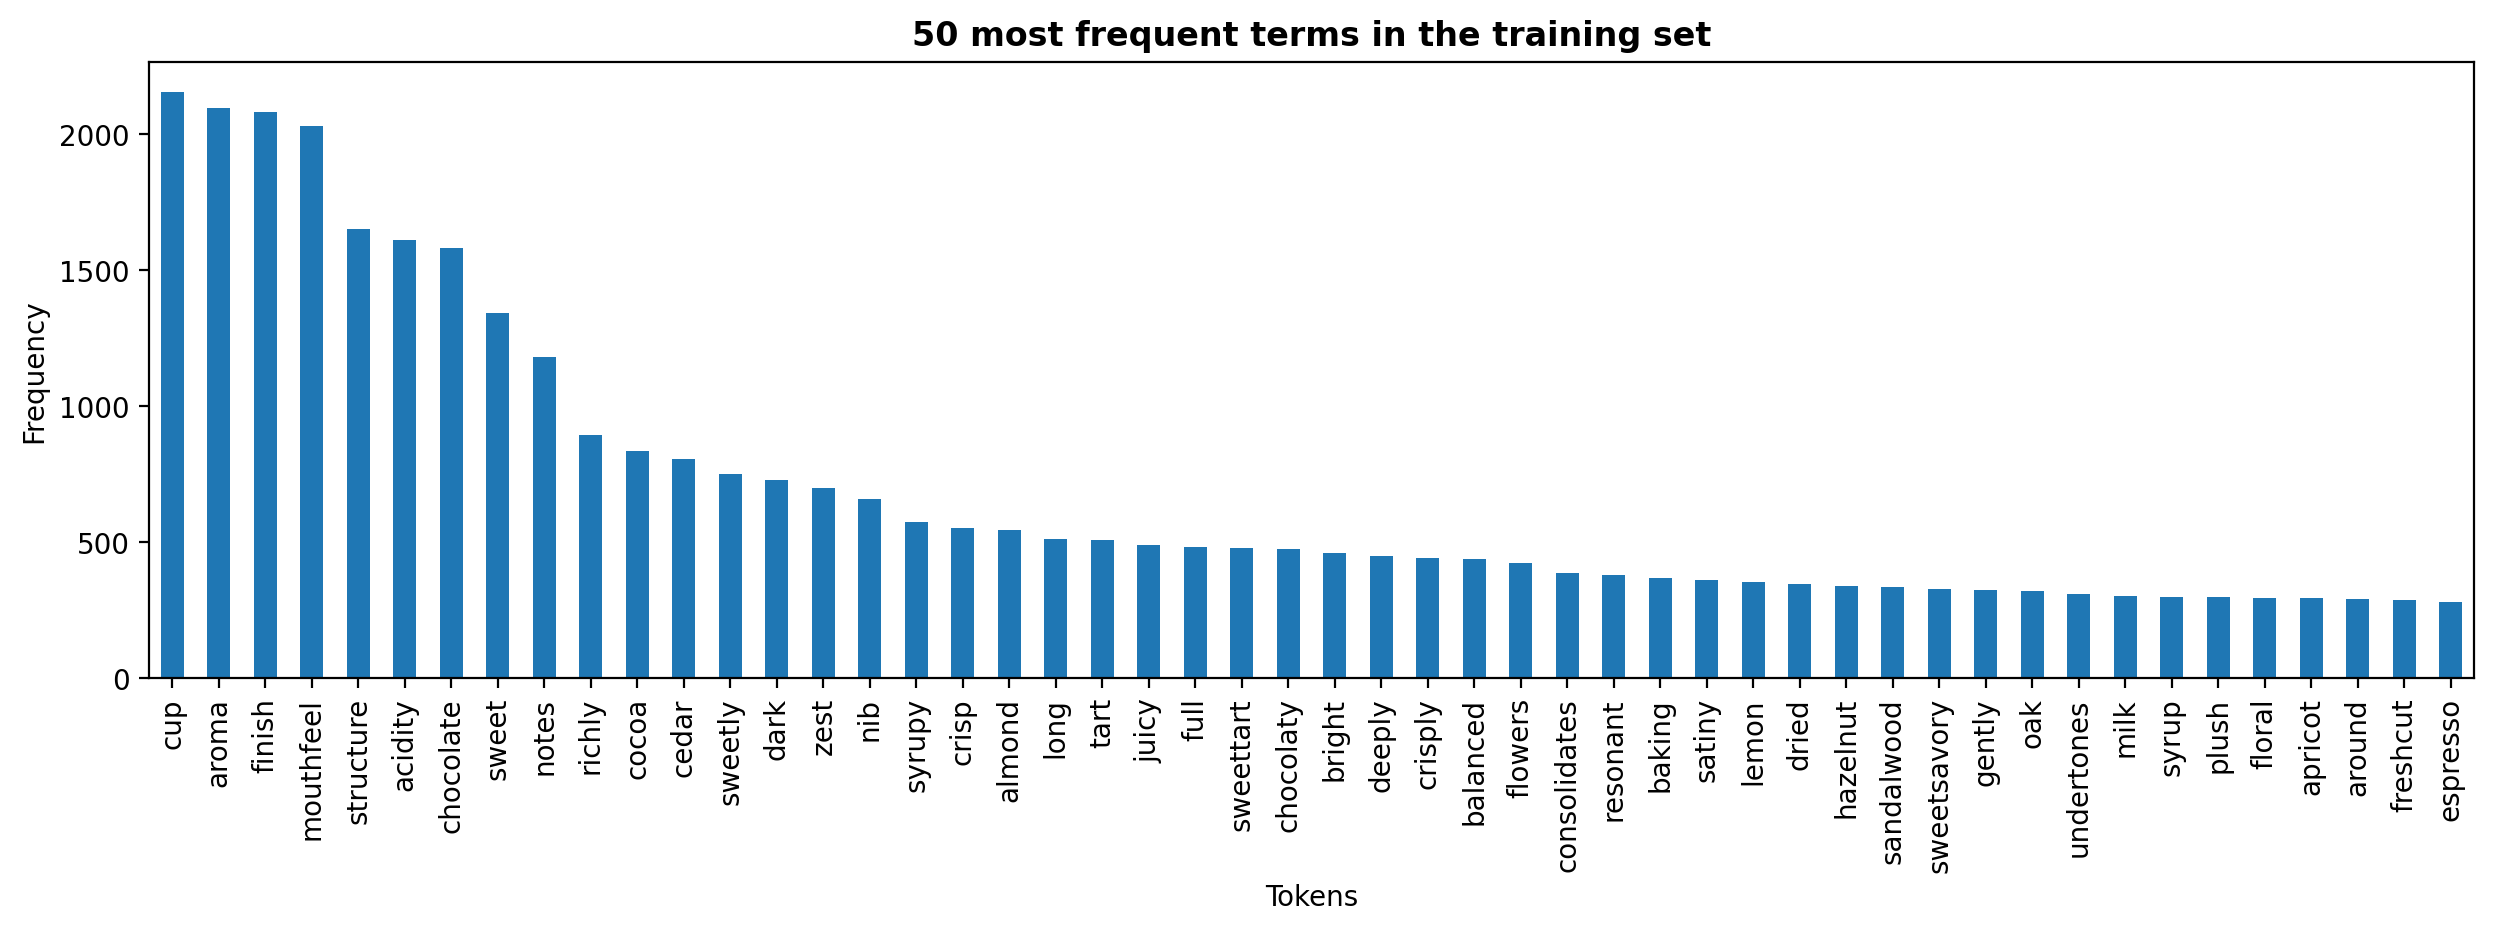

In [12]:
# Get 50 most frequent words in the training set
frequent_words = pd.Series(' '.join(df_train.clean_text).split()).value_counts()[:50]
frequent_words.plot.bar(figsize=(15,4))
plt.title('50 most frequent terms in the training set', fontweight="bold")
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

In [13]:
# I found that the variable 'frequent_words' takes up about 6 Gb of RAM! Better clean it up!
import gc

del frequent_words

gc.collect()

15144

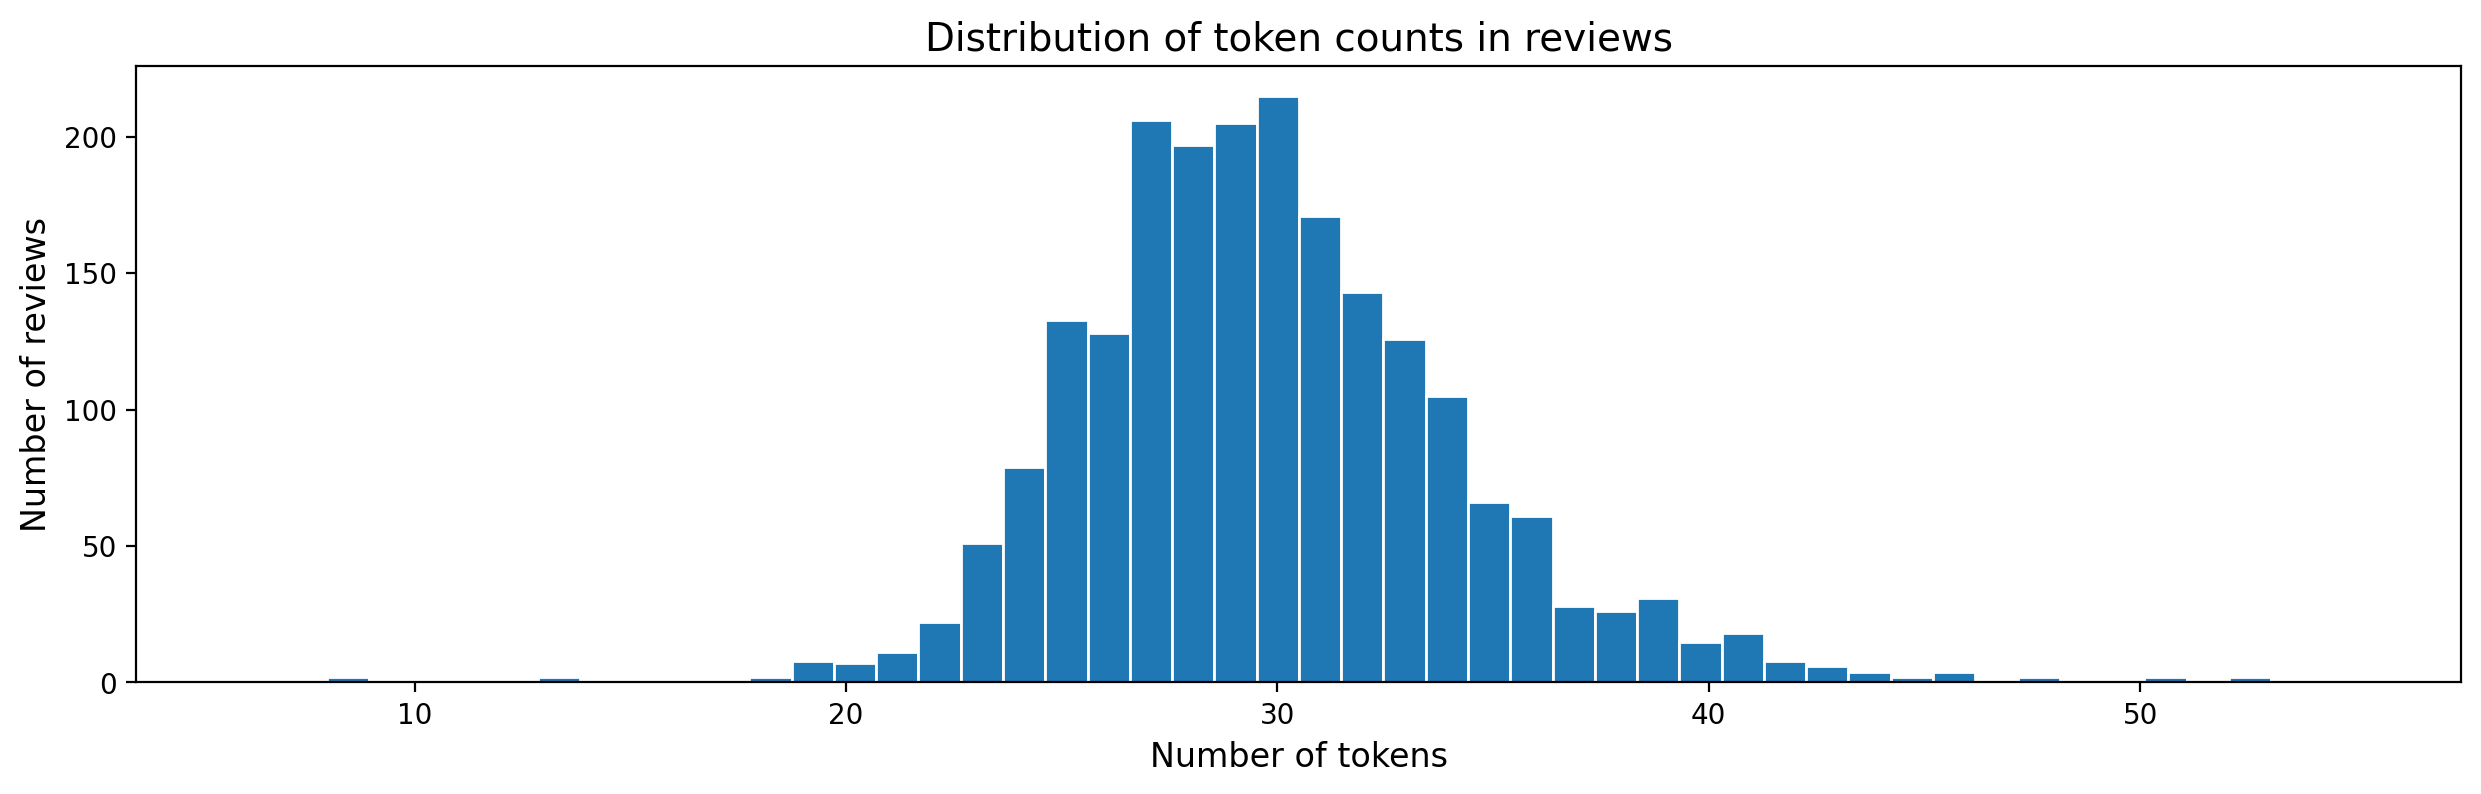

In [14]:
# Plot the number of tokens in cleaned reviews
plt.figure(figsize=(15,4))
plt.hist(df_train['clean_text'].apply(lambda x:len(x.split())), bins=50, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of reviews',fontsize=12)
plt.title('Distribution of token counts in reviews', fontsize=14)
plt.show()

In [15]:
# Filter rows with less than 250 tokens
less_than_250 = df_train['clean_text'].apply(lambda x: len(x.split())) < 250  # Check by getting True and False values

# Print percentage
print(f"{(sum(less_than_250) / len(df_train) * 100):.2f}% of rows have less than 250 tokens.")

100.00% of rows have less than 250 tokens.


In [16]:
# Remove original text column
df_train = df_train.drop(columns=['desc_1'])

# Get few entries to check operation
df_train.head()

,rating,review_date,clean_text
0,95,November 2017,evaluated espresso sweettoned deeply rich choc...
1,94,November 2017,evaluated espresso sweetly tart floraltoned ho...
2,92,November 2017,crisply sweet cocoatoned lemon blossom roasted...
3,92,November 2017,delicate sweetly spicetoned pink peppercorn da...
4,94,November 2017,deeply sweet subtly pungent honey pear tangeri...


# Test Set

Importing and processing the text data as did in the training set

In [17]:
# Import training data
df_test = pd.read_csv('/kaggle/input/coffee-reviews-dataset/simplified_coffee.csv')

# Print a random row
df_test.sample()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
659,Guatemala Acatenango,Sunny's Coffee,Medium-Light,Japan,Guatemala,8.71,93,January 2021,"Crisply sweet, gently resonant. Freesia, apric..."


In [18]:
%%time

# Remove unceccessary columns
df_test = df_test.drop(columns=['name','roaster','roast','loc_country','origin','100g_USD'])

# Preprocess training data adding new column
df_test["clean_text"] = df_test["review"].apply(preprocess_review)

# Remove original text column
df_test = df_test.drop(columns=['review'])

# Get few entries to check cleaning operation
df_test.head()

CPU times: user 35.8 ms, sys: 33 µs, total: 35.8 ms
Wall time: 35.2 ms


,rating,review_date,clean_text
0,92,November 2017,crisply sweet cocoatoned lemon blossom roasted...
1,92,November 2017,delicate sweetly spicetoned pink peppercorn da...
2,94,November 2017,deeply sweet subtly pungent honey pear tangeri...
3,93,November 2017,delicate richly sweetly tart dried hibiscus fi...
4,93,November 2017,hightoned floral dried apricot magnolia almond...


In [19]:
#Label_encoding For ratings.
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df_train['rating']=label_encoder.fit_transform(df_train['rating'])
df_test['rating']=label_encoder.fit_transform(df_test['rating'])


# Split the Data

In [20]:
# Create X, y arrays
from sklearn.model_selection import train_test_split

# Training data
X_train = df_train["clean_text"].values
y_train = df_train["rating"].values

# Split into train/test sets
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Test data
X_te = df_test["clean_text"].values

print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_va.shape, y_va.shape)
print("Test data:", X_te.shape)

Training data: (1676,) (1676,)
Validation data: (419,) (419,)
Test data: (1246,)


# Model Part

Given the dataset's size and my preference for using a Neural Network model, it's certainly worthwhile to employ an accelerator. Below are the default setup settings for enabling the TPU (Tensor Processing Unit).

In [21]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

Number of replicas: 1


In [22]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on CPU
Number of accelerators:  1


Now, this code uses the Keras module from TensorFlow to preprocess text data. Specifically, it uses the 'Tokenizer' function to convert the text into a sequence of integers, and the 'pad_sequences' function to ensure that each sequence has the same length.

In [23]:
%%time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_tr)

max_seq_length = 250

X_tr_seq = tokenizer.texts_to_sequences(X_tr)
X_tr_seq = pad_sequences(X_tr_seq, maxlen=max_seq_length)

X_va_seq = tokenizer.texts_to_sequences(X_va)
X_va_seq = pad_sequences(X_va_seq, maxlen=max_seq_length)

X_te_seq = tokenizer.texts_to_sequences(X_te)
X_te_seq = pad_sequences(X_te_seq, maxlen=max_seq_length)

CPU times: user 121 ms, sys: 0 ns, total: 121 ms
Wall time: 121 ms


In [24]:
X_tr_seq 

array([[  0,   0,   0, ..., 459,  35,  12],
       [  0,   0,   0, ...,   9, 217, 241],
       [  0,   0,   0, ...,  74,  15,  12],
       ...,
       [  0,   0,   0, ...,  29, 168,   3],
       [  0,   0,   0, ...,  11,  16, 332],
       [  0,   0,   0, ...,  74,  15,  86]], dtype=int32)

In [25]:
X_va_seq

array([[  0,   0,   0, ...,  61, 269,   3],
       [  0,   0,   0, ...,   8, 297,   9],
       [  0,   0,   0, ..., 269,   7,   9],
       ...,
       [  0,   0,   0, ...,   8,  35,   9],
       [  0,   0,   0, ...,  11,  44, 180],
       [  0,   0,   0, ...,  21,  91,   3]], dtype=int32)

In [26]:
X_te_seq

array([[  0,   0,   0, ..., 259, 131,  21],
       [  0,   0,   0, ..., 160,  44,   9],
       [  0,   0,   0, ...,  93, 156,  21],
       ...,
       [  0,   0,   0, ..., 114, 102,  21],
       [  0,   0,   0, ...,   9,  49,  35],
       [  0,   0,   0, ...,  87, 211, 147]], dtype=int32)

Let's build the model. There are various approaches available, but I decided to experiment with a combination of several different layers, including a convolutional layer and a bidirectional LTSM layers. Probably these ones may be responsible for slowing down the training time more than the other layers. Anyway, let's evaluate it afterwards:

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=250))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=6, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 248, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 124, 128)         66048     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 124, 128)         512       
 ormalization)                                                   
                                                        

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)



In [29]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [30]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(X_tr_seq,
                    y_tr,
                    validation_data=(X_va_seq, y_va),
                    epochs=15, 
                    batch_size=64
                    )

Epoch 1/15
27/27 [==============================] - 2s 16ms/step - loss: 1.6521 - mean_squared_logarithmic_error: 1.6068 - val_loss: 0.2415 - val_mean_squared_logarithmic_error: 0.2376
Epoch 2/15
27/27 [==============================] - 0s 7ms/step - loss: 0.1990 - mean_squared_logarithmic_error: 0.1995 - val_loss: 0.2473 - val_mean_squared_logarithmic_error: 0.2431
Epoch 3/15
27/27 [==============================] - 0s 7ms/step - loss: 0.1709 - mean_squared_logarithmic_error: 0.1686 - val_loss: 0.2324 - val_mean_squared_logarithmic_error: 0.2294
Epoch 4/15
27/27 [==============================] - 0s 8ms/step - loss: 0.1621 - mean_squared_logarithmic_error: 0.1630 - val_loss: 0.2073 - val_mean_squared_logarithmic_error: 0.2042
Epoch 5/15
27/27 [==============================] - 0s 8ms/step - loss: 0.1524 - mean_squared_logarithmic_error: 0.1542 - val_loss: 0.1690 - val_mean_squared_logarithmic_error: 0.1658
Epoch 6/15
27/27 [==============================] - 0s 8ms/step - loss: 0.1478 

In [31]:
X_tr_seq.shape 

(1676, 250)

In [32]:
X_va_seq.shape

(419, 250)

In [33]:
y_tr.shape

(1676,)

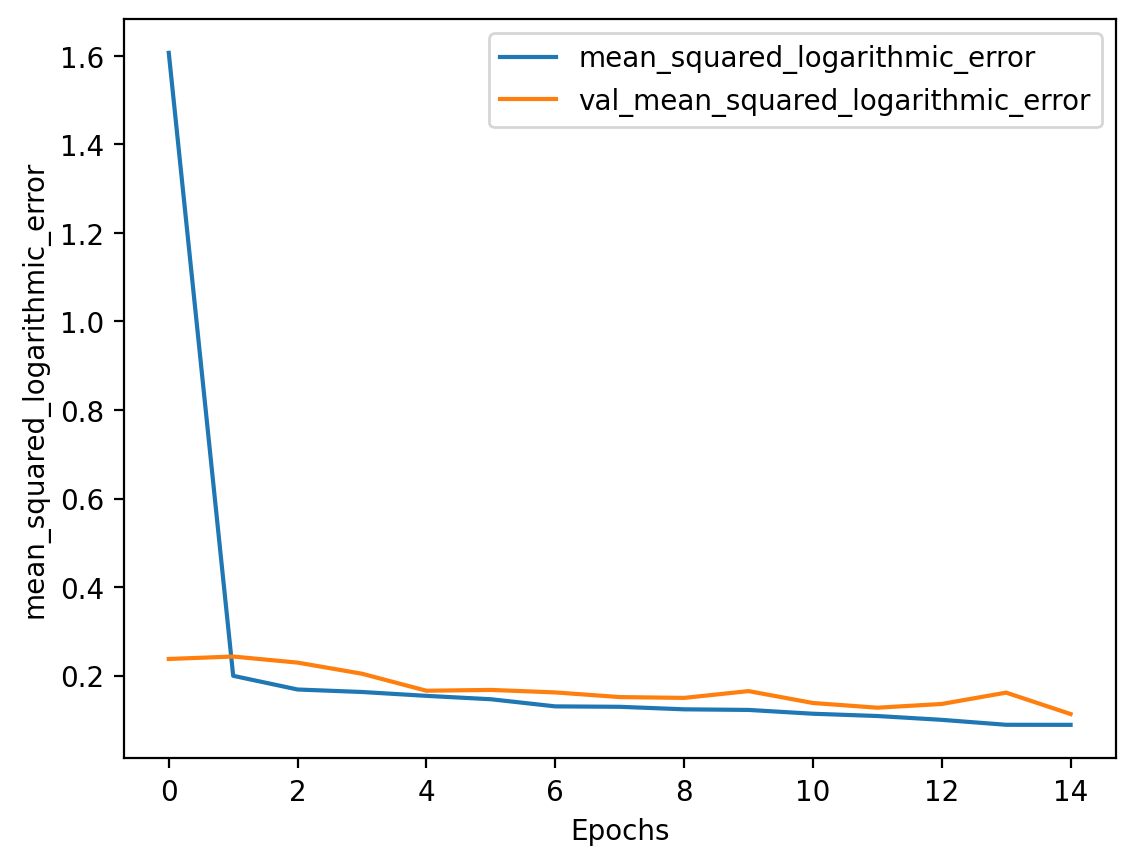

In [34]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
    
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

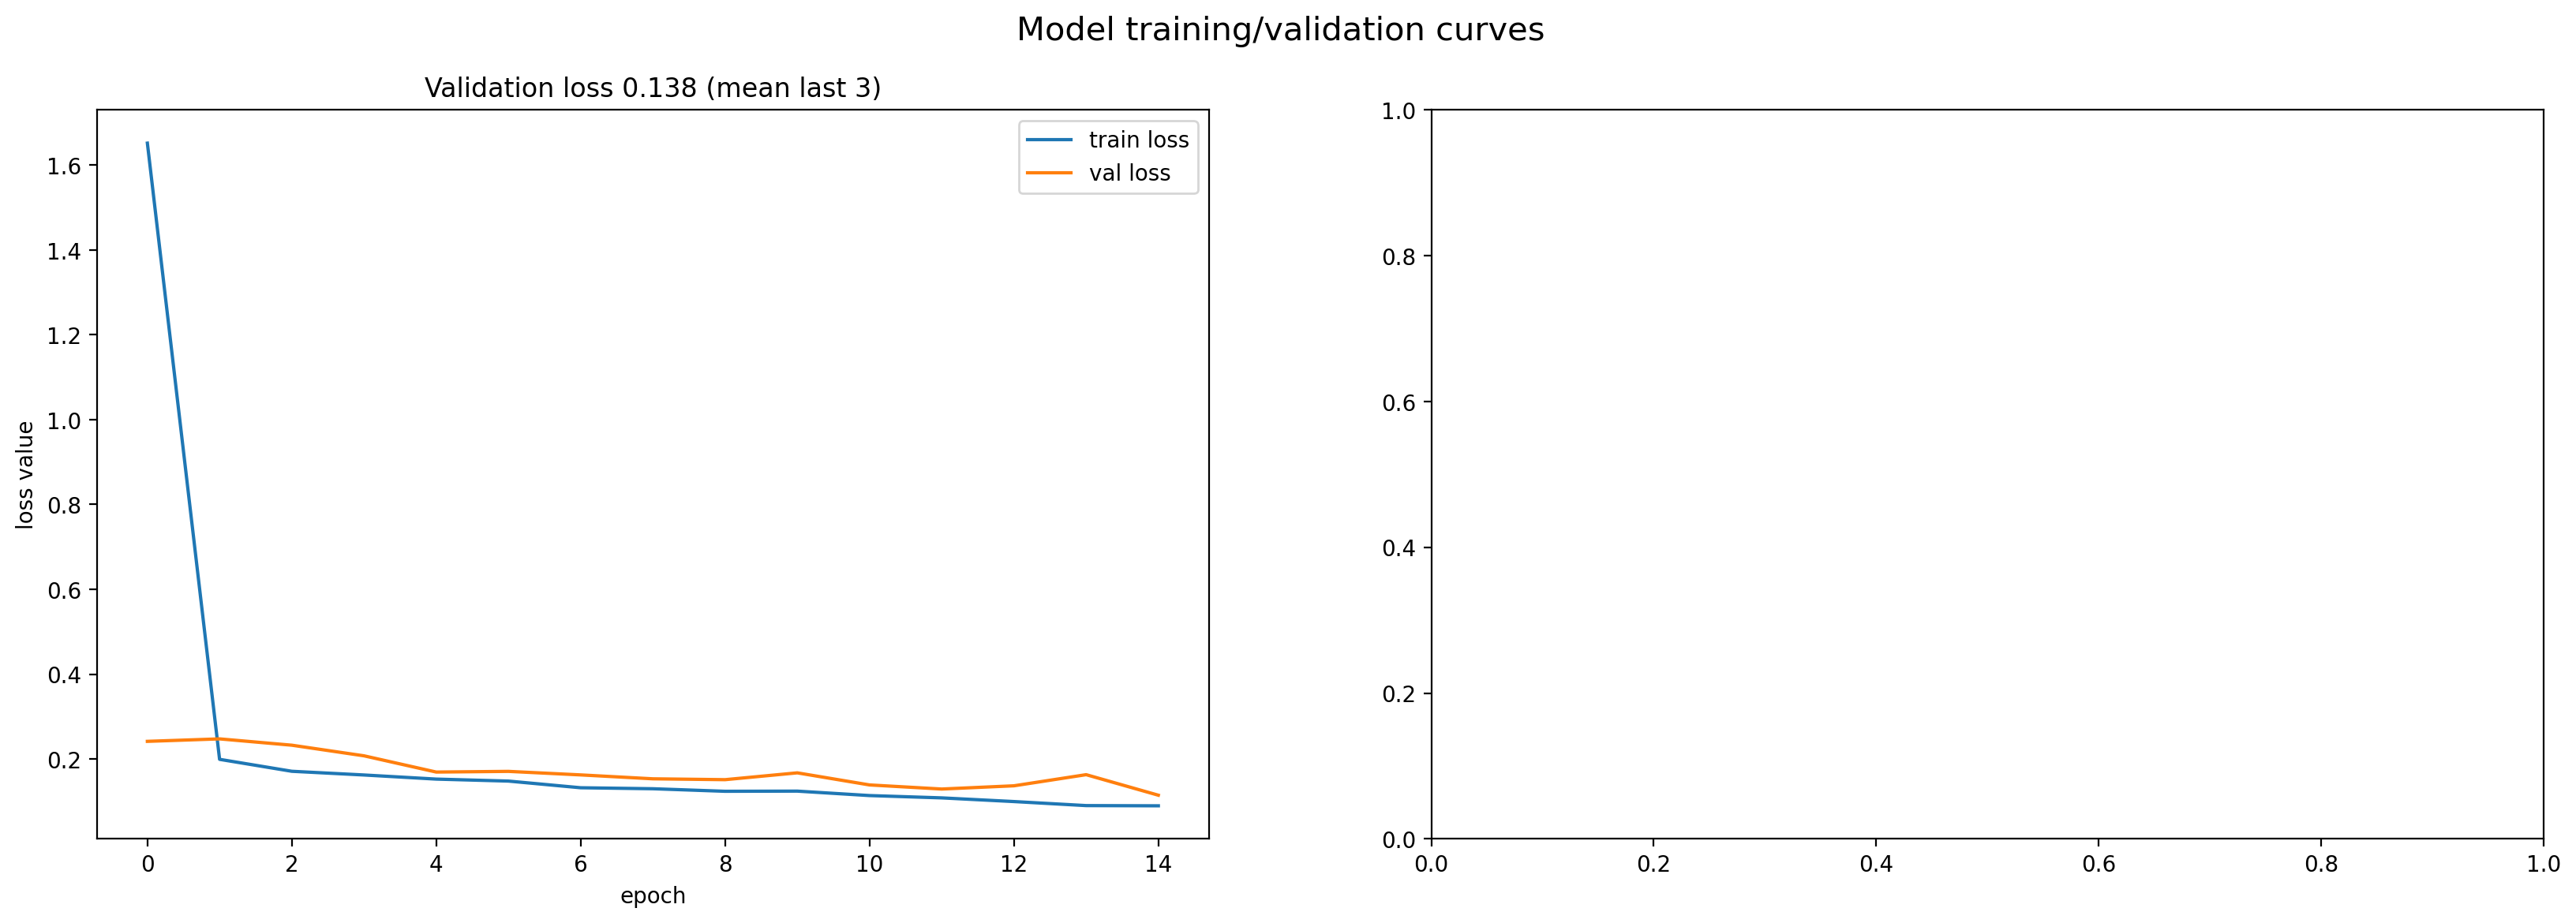

In [35]:
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()



In [36]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

14/14 [==============================] - 0s 2ms/step - loss: 0.1144 - mean_squared_logarithmic_error: 0.1090
Validation loss: 0.11443950980901718
Validation accuracy: 0.10897558927536011


In [37]:
# Compute validation set predictions
pred = [np.argmax(i) for i in model.predict(X_va_seq)]

14/14 [==============================] - 0s 2ms/step


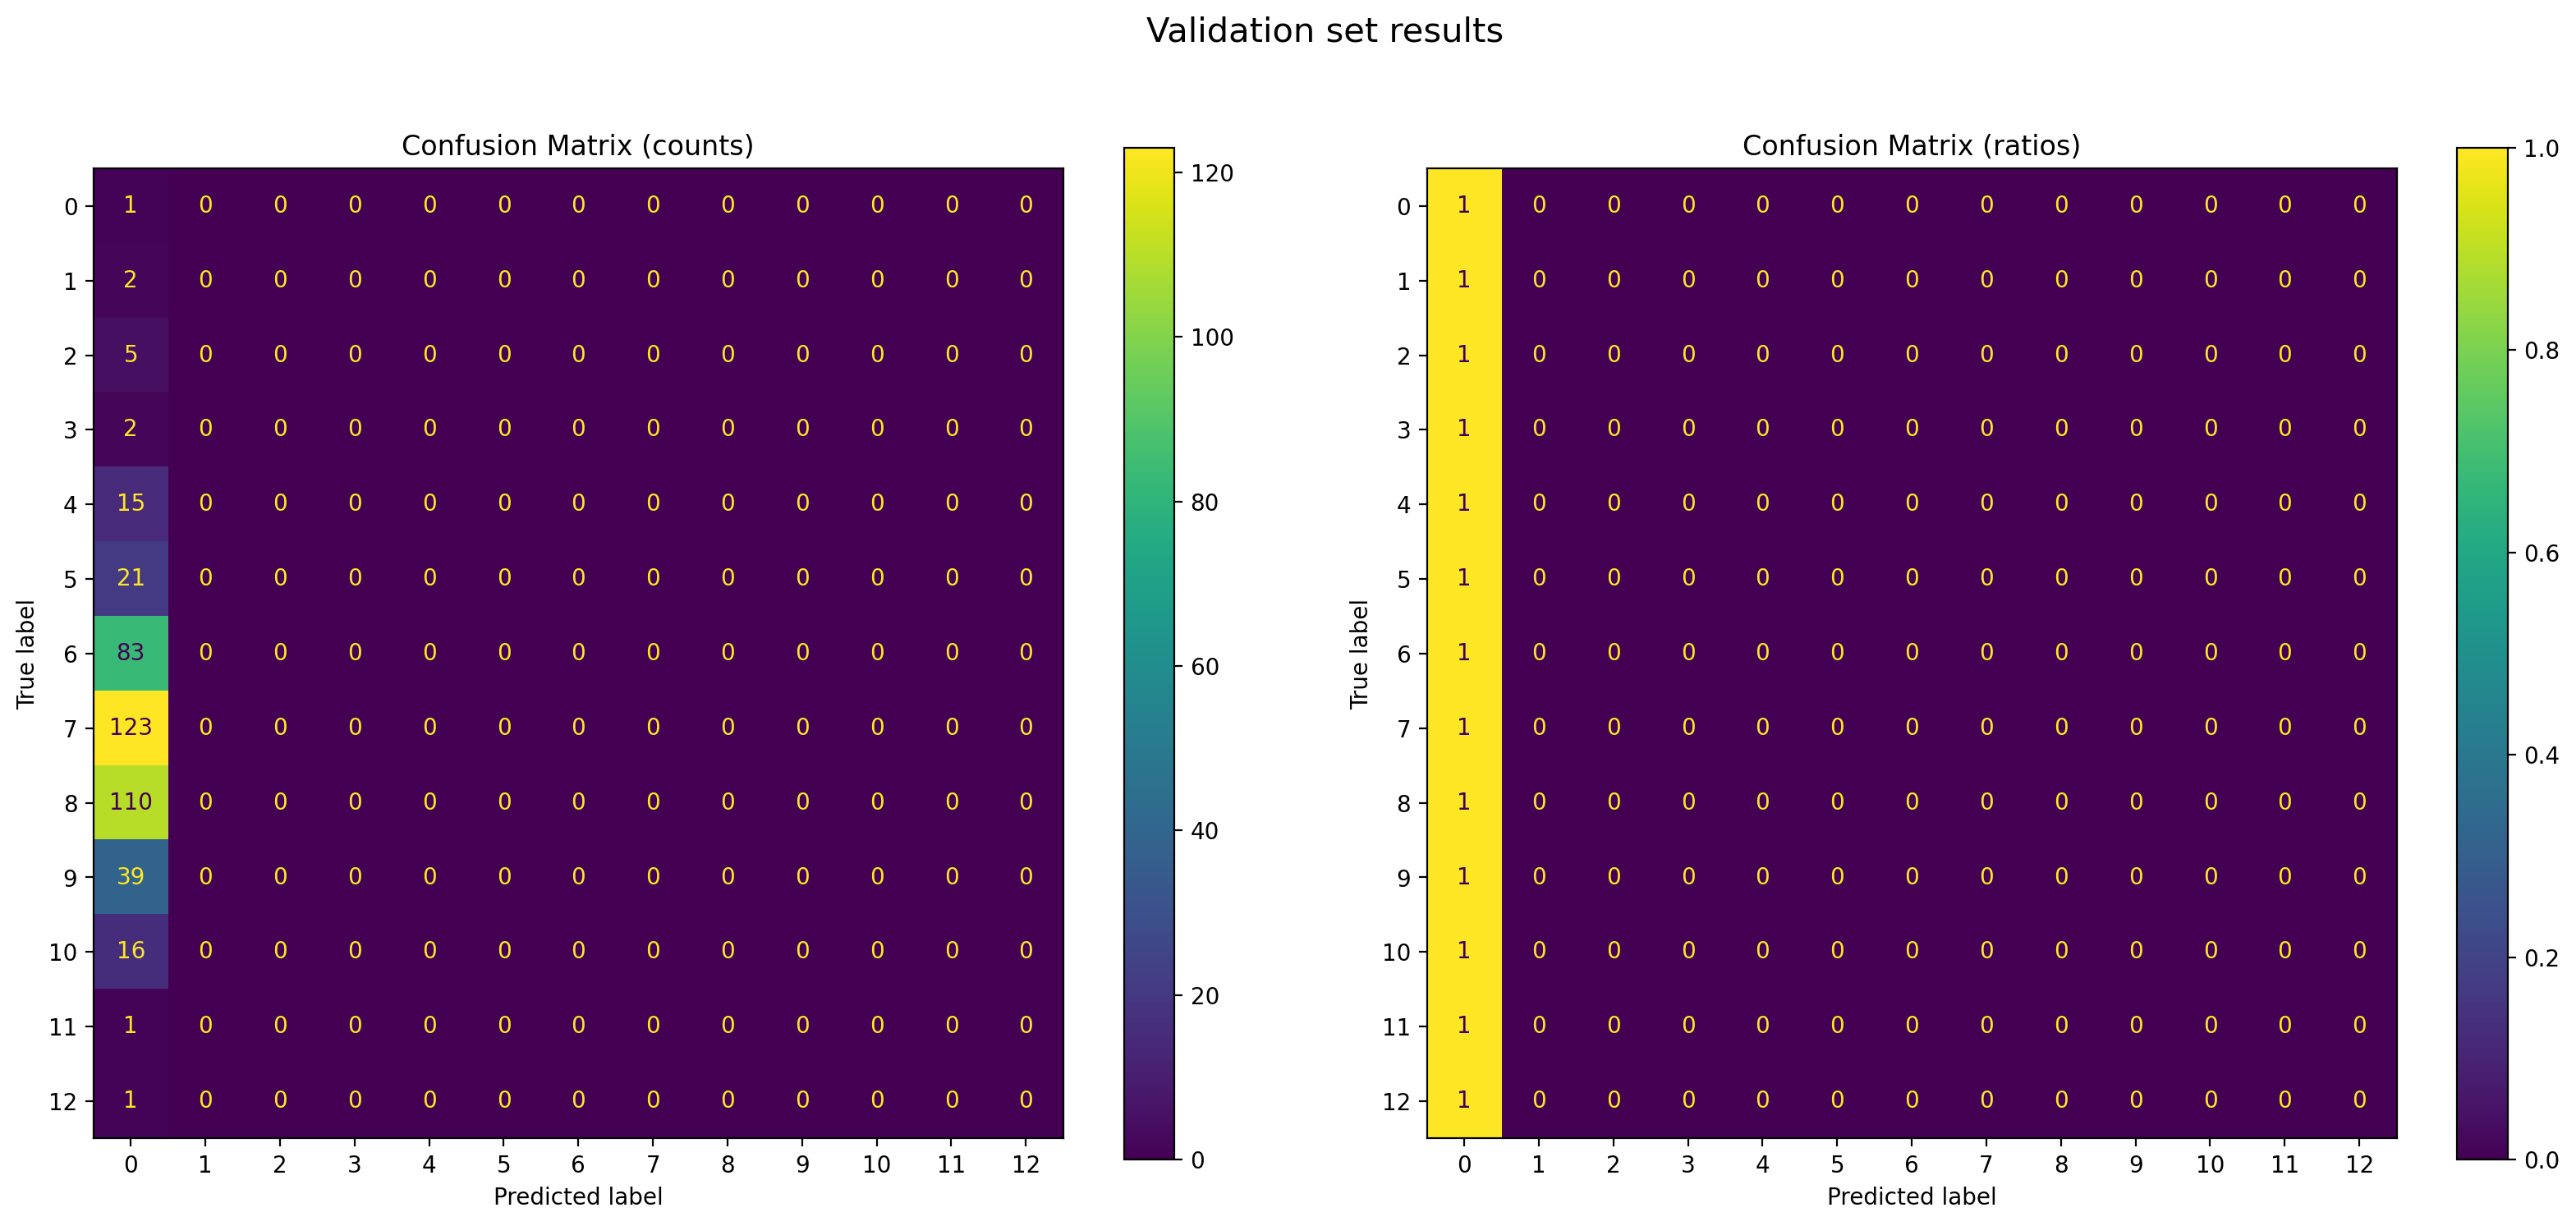

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for raw counts
cm_raw = confusion_matrix(y_va, pred)

# Compute confusion matrix for normalized ratios
cm_norm = confusion_matrix(y_va, pred, normalize='true')

# Create confusion matrix plots
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={"width_ratios": [10, 10], "wspace": 0.1}, subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size = 15)
disp_raw.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix (counts)')
disp_norm.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix (ratios)')
plt.show()

Based on the confusion matrices in the validation set, we can see that the model performed better with 4 and 5-star ratings. This is not surprising given that these ratings had the largest number of samples available for the training.

Concerning the errors, overall the model tends to predict ratings that are close to each other, for instance often mistakenly predicting a rating of 2 for a rating of 3, or vice versa.

# Make predictions

In [39]:
# Compute test set predictions
predictions = [np.argmax(i) for i in model.predict(X_te_seq)]
    
# Create a new DataFrame to merge review ids and the model predictions
submission = pd.DataFrame({'review_date': df_test.review_date, 'rating': predictions})

# Check few random entries
submission.sample(10)

39/39 [==============================] - 0s 2ms/step


,review_date,rating
33,January 2018,0
297,June 2019,0
738,March 2021,0
876,September 2021,0
1015,February 2022,0
868,September 2021,0
1071,May 2022,0
287,May 2019,0
1027,February 2022,0
862,September 2021,0


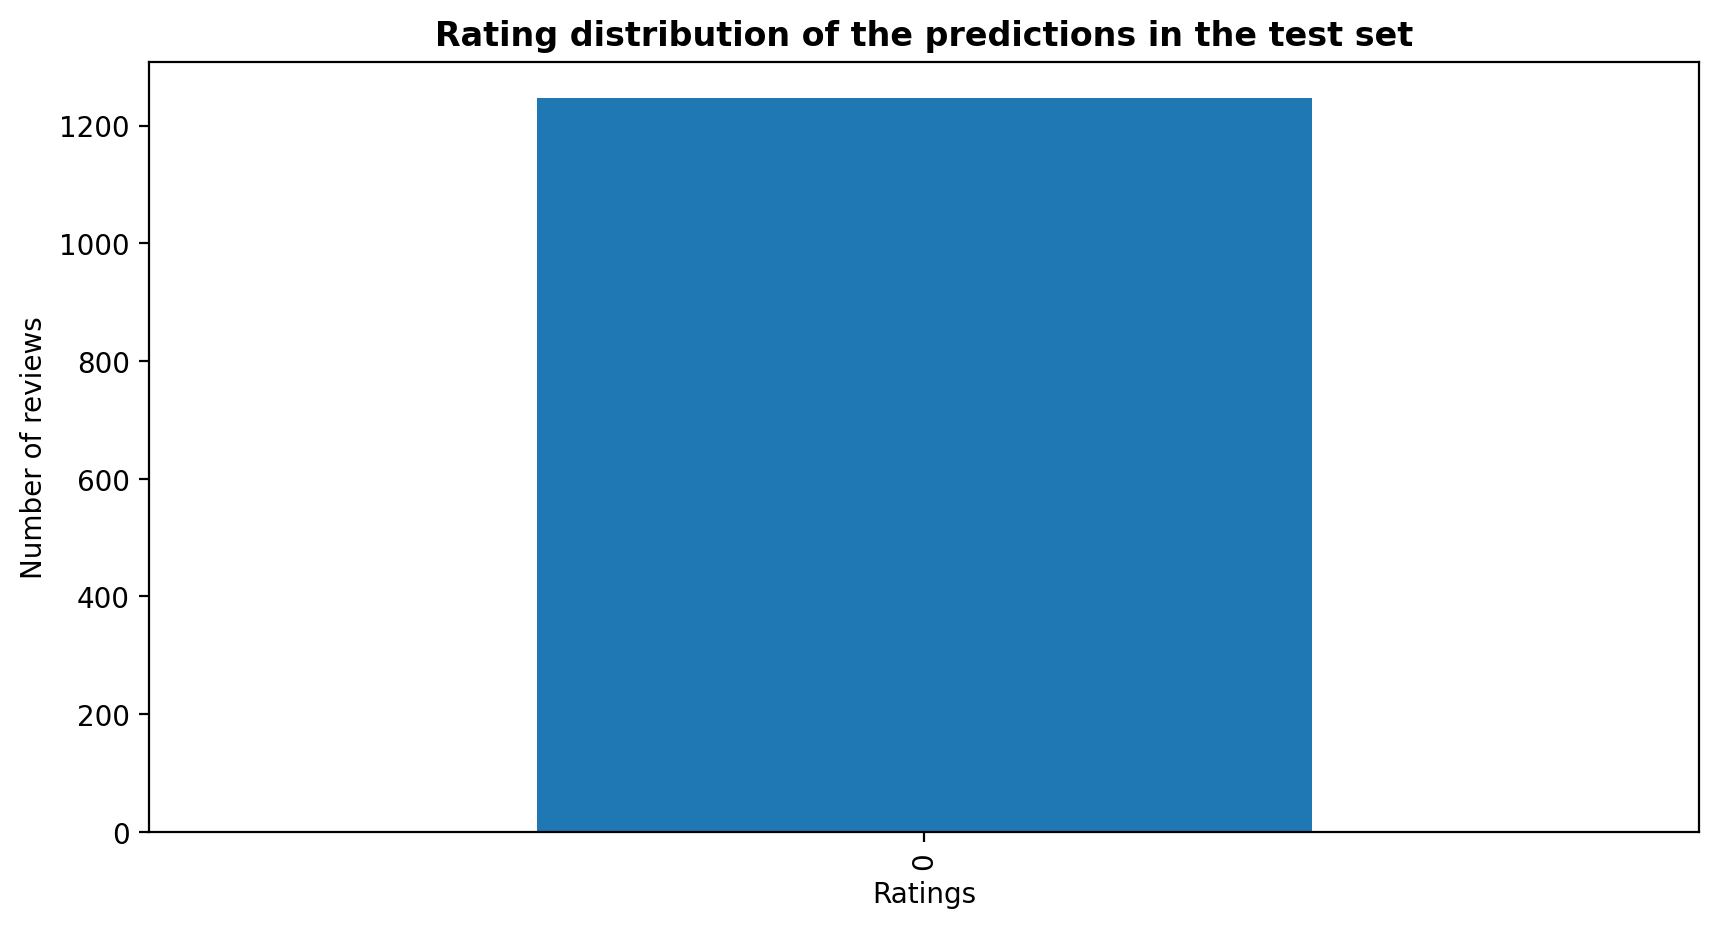

In [40]:
# Check target balance
submission['rating'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Rating distribution of the predictions in the test set', fontweight="bold")
plt.xlabel('Ratings')
plt.ylabel('Number of reviews')
plt.show()

In [41]:
# Export predictions
submission.to_csv("submission.csv", index=None)

In [42]:
y_pred = model.predict(X_te_seq)

39/39 [==============================] - 0s 2ms/step
